In [1]:
import warnings; warnings.simplefilter("ignore")
import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
%matplotlib inline

## 5.2 交互作用とPDの限界

In [2]:
from util import generate_simulation_data

X_train, X_test, y_train, y_test = generate_simulation_data(simulation=1)

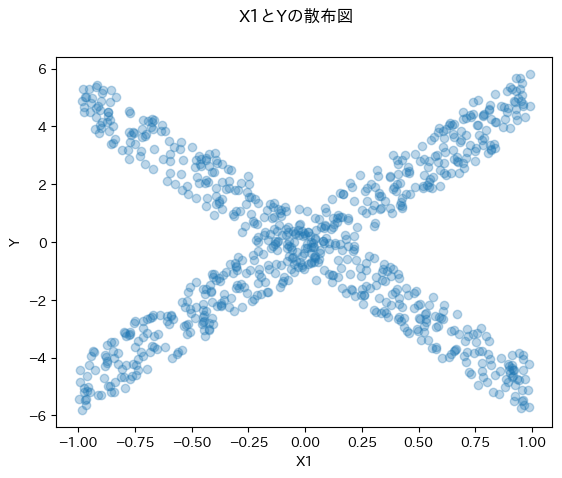

In [3]:
from util import plot_scatter

plot_scatter(
    X_train[:,1], y_train, title="X1とYの散布図", xlabel="X1", ylabel="Y", simulation=1
)

In [4]:
import sys; sys.path.append('..')
from ch4.util import regression_metrics
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, random_state=42).fit(X_train, y_train)
regression_metrics(rf, X_test, y_test)

,RMSE,R2
0,0.559915,0.966191


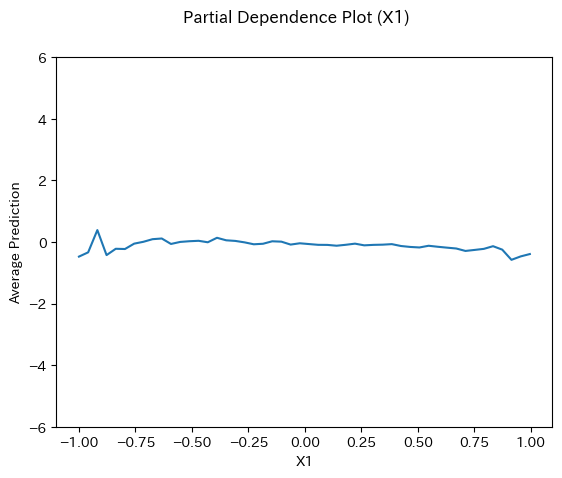

In [5]:
from ch4.PD import PartialDependence

pdp = PartialDependence(rf, X_test, ["X0","X1","X2"])
pdp.partial_dependence("X1")
pdp.plot(ylim=(-6,6))

## 5.3 ICEの適用

In [6]:
from ICE import IndividualConditionalExpectation

ice = IndividualConditionalExpectation(rf, X_test, ["X0","X1","X2"])

# インスタンス0について、X1のICE
ice.individual_conditional_expectation("X1",[0])
ice.df_instance

,instance,prediction,X0,X1,X2
0,0,-3.68,-0.24,-0.73,1.00


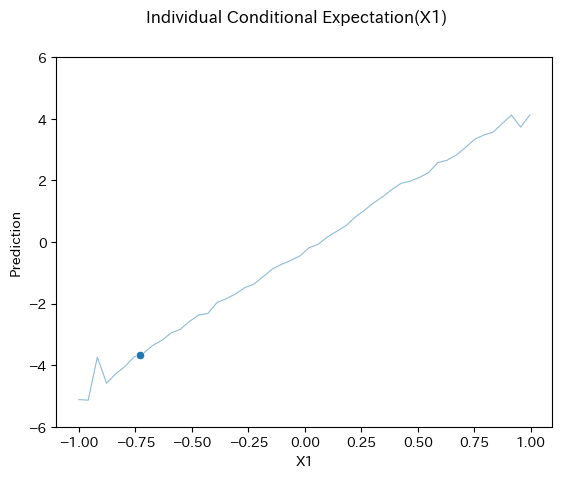

In [7]:
ice.plot(ylim=(-6,6))

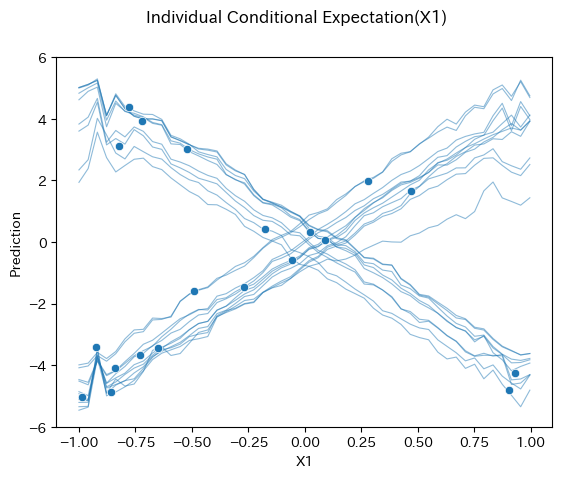

In [8]:
# インスタンス0から19までの、X1のICE
ice.individual_conditional_expectation("X1",range(20))
ice.plot(ylim=(-6,6))

## 5.4 Conditional Partial Dependence

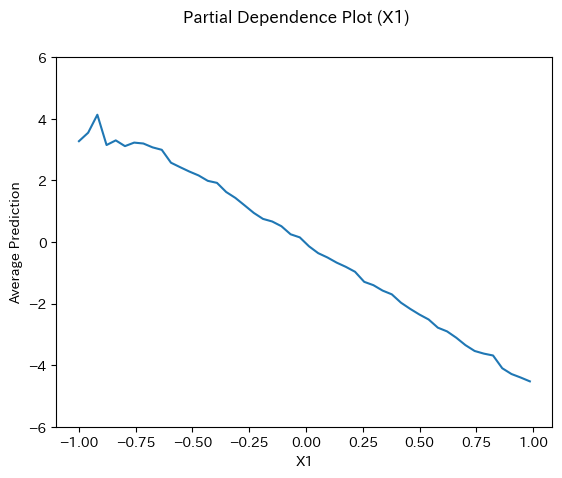

In [9]:
# X2=0のインスタンスに対して, X1のPDを計算
pdp = PartialDependence(rf, X_test[X_test[:,2]==0], ["X0","X1","X2"])
pdp.partial_dependence("X1")
pdp.plot(ylim=(-6,6))

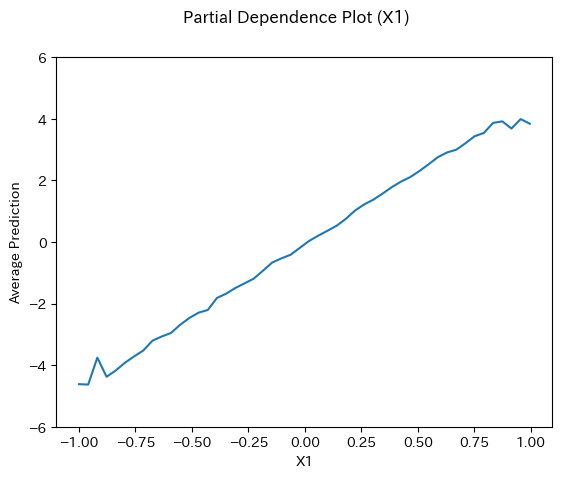

In [10]:
# X2=1のインスタンスに対して, X1のPDを計算
pdp = PartialDependence(rf, X_test[X_test[:,2]==1], ["X0","X1","X2"])
pdp.partial_dependence("X1")
pdp.plot(ylim=(-6,6))

## 5.5.2 特徴量に依存関係があるケース

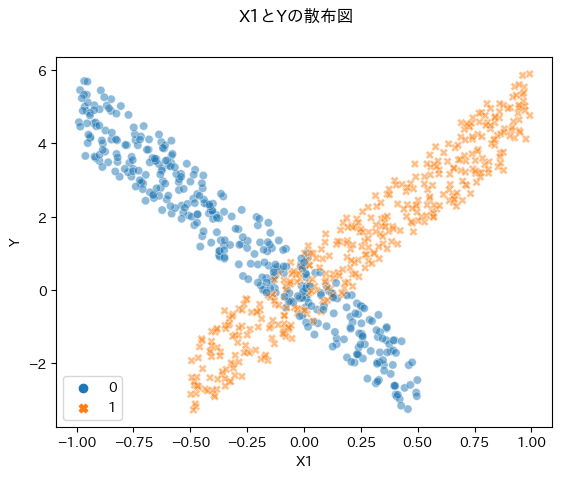

In [11]:
X_train, X_test, y_train, y_test = generate_simulation_data(simulation=2)

plot_scatter(
    X_train[:,1],
    y_train,
    group=X_train[:,2].astype(int),
    title="X1とYの散布図",
    xlabel="X1",
    ylabel="Y",
    simulation=2
)

In [12]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42).fit(X_train, y_train)
regression_metrics(rf, X_test, y_test)

,RMSE,R2
0,0.40,0.97


In [13]:
# インスタンス0に関して、特徴量X1のICEを計算
ice = IndividualConditionalExpectation(rf, X_test, ["X0","X1","X2"])
ice.individual_conditional_expectation('X1',[0])
ice.df_instance

,instance,prediction,X0,X1,X2
0,0,-1.78,-0.24,-0.30,1.00


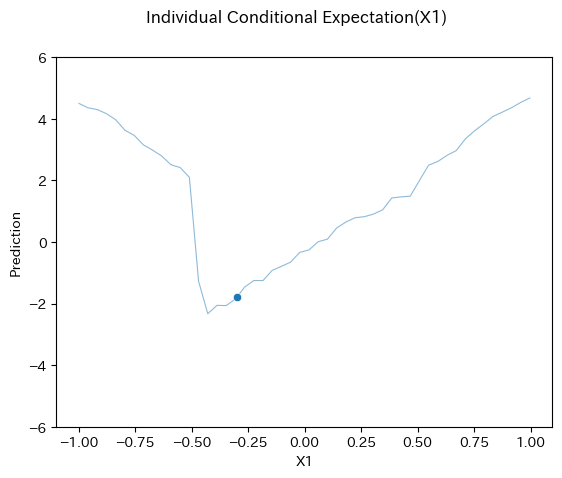

In [14]:
ice.plot(ylim=(-6,6))